In [1]:

from utils.load import load_data, load_submission
from utils.feature import (
    add_hours,
    add_hours_trig_cyclic,
    apply_feature_engineering,
    get_dummies,
    fill_na_zero,
    drop_non_input_cols,
    normalize,
    standardize
)
from utils.model import ModelEvalWrapper

In [2]:
train_df, predict_df = load_data('../data')

In [3]:
_train_df, _predict_df = apply_feature_engineering(
    train_df,
    predict_df,
    funcs=[
        add_hours,
        fill_na_zero("all"),
        normalize(["txpower_cell0", "txpower_cell1", "txpower_cell2", "txpower_cell3"]),
        standardize(
            [
                "bandwidth_cell0",
                "antennas_cell0",
                "bandwidth_cell1",
                "antennas_cell1",
                "bandwidth_cell2",
                "antennas_cell2",
                "bandwidth_cell3",
                "antennas_cell3",
            ]
        ),
        get_dummies(
            [
                "hour",
                "rutype",
                "mode",
                "frequency_cell0",
                "frequency_cell1",
                "frequency_cell2",
                "frequency_cell3",
            ]
        ),
        drop_non_input_cols,
    ],
)


In [4]:
from sklearn.linear_model import LinearRegression

model_getter = lambda: LinearRegression()
model_trainer = lambda model, X, y, *args, **kwargs: model.fit(X, y)
model_predictor = lambda model, X: model.predict(X)
model_eval = ModelEvalWrapper(
    model_getter,
    name="Basic Linear Regression",
    model_trainer=model_trainer,
    model_predictor=model_predictor,
)

model_eval.train_and_eval(_train_df)


INFO:root:Fold 1/5
INFO:root:Train MAE: 3.2889, MAPE: 0.1348, MSE: 19.8868
INFO:root:Test MAE: 3.3017, MAPE: 0.1362, MSE: 19.9149
INFO:root:Fold 2/5
INFO:root:Train MAE: 3.2956, MAPE: 0.1352, MSE: 19.8926
INFO:root:Test MAE: 3.2866, MAPE: 0.1342, MSE: 19.9539
INFO:root:Fold 3/5
INFO:root:Train MAE: 3.2853, MAPE: 0.1350, MSE: 19.8591
INFO:root:Test MAE: 183028713.3548, MAPE: 6618714.0294, MSE: 620611898221916192768.0000
INFO:root:Fold 4/5
INFO:root:Train MAE: 3.3011, MAPE: 0.1356, MSE: 19.9647
INFO:root:Test MAE: 3.2556, MAPE: 0.1333, MSE: 19.5817
INFO:root:Fold 5/5
INFO:root:Train MAE: 3.2844, MAPE: 0.1348, MSE: 19.8343
INFO:root:Test MAE: 79406344.2873, MAPE: 1825527.3565, MSE: 116806923419585773568.0000
INFO:root:
Best model from fold 4
INFO:root:Best model mae: 3.2556, mape: 0.1333 mse: 19.5817

INFO:root:Average mae: 52487013.4972, mape: 1688848.3579, mse: 147483764328300380160.0000
INFO:root:Std mae: 72153232.0775, mape: 2564327.6566, mse: 240850859193456361472.0000

INFO:root:Ana

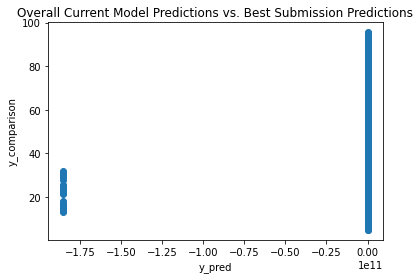

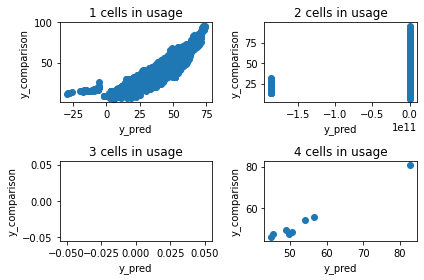

In [5]:
best_submission = load_submission("bestsubmission.csv")
model_eval.compare_predictions_with(_predict_df, best_submission['Energy'])